**Name:** <span style="color:red">Melitsa Hesseling, Alessandro Giulivo</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 7
# Solving the master equation


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math

The aim of this practical is to solve the master equation of a birth-death processes in different situations. We will begin with the case of ***constitutive expression***. To that end, we will first write a computer code that calculates, following the steps described in class, the stationary probability density $P(n)$ of a birth-death process with constitutive expression ($C(n)=\alpha$, $D(n)=\delta n$), which we will use as a control in what follows, and plot the resulting distribution $P(n)$. Use the following parameter values: $\alpha=10$, $\delta=1.$

The solution of the master equation for this constitutive expression case can be obtained analytically, and shown to correspond to the Poisson distribution:
$$
p(n)=\frac{\lambda^n}{n!}\exp(-\lambda),
$$
where $\lambda=\alpha/\delta$ is the deterministic solution. Compare the numerical solution that you have obtained with the analytical expression of the Poisson distribution, and with the deterministic equilibrium of the system

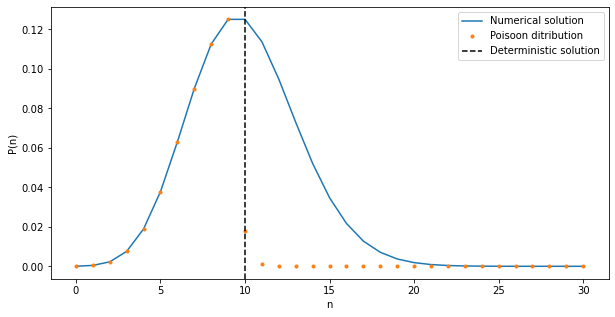

In [2]:
n = 30
n_vec = np.arange(0, n+1)

def creation(n):
    alpha = 10
    return alpha

def destruction(n):
    delta = 1
    return delta*n
    
def prob(n_vec):   # n is an integer
    Pn_vec = np.empty(len(n_vec))
    Pn_vec[0] = 1
    for n in range(1, len(n_vec)):
        Pn_vec[n] = creation(n-1)/destruction(n) * Pn_vec[n-1]
    Pn_norm = Pn_vec / np.sum(Pn_vec)
    return Pn_norm

poisson = (10**n_vec/sp.factorial(n_vec))*np.exp(-10)

plt.figure(figsize = (10, 5))
plt.plot(n_vec, prob(n_vec), label = "Numerical solution")
plt.plot(n_vec, poisson, '.', label = "Poisoon ditribution")
plt.xlabel('n')
plt.ylabel('P(n)')
plt.axvline(10, linestyle = '--', color = "black", label = "Deterministic solution")
plt.legend()
plt.show()

---

<span style="color:red">The Poisson distribution fits our numerical solution quite well, and the mean for both of them corresponds to the deterministic solution ($\alpha/\delta = 10$). The points for high n in the Poisson distribution are not showing the correct curve, probably because of computing issues in my laptop when calculating a n!. </span>

---

Next, write another computer code that calculates the stationary probability density $P(n)$ of a birth-death process with negative feedback (defined by $C(n)=\frac{\alpha_n}{1+n/k}$), with $\alpha_n=55$ and $k=2$.

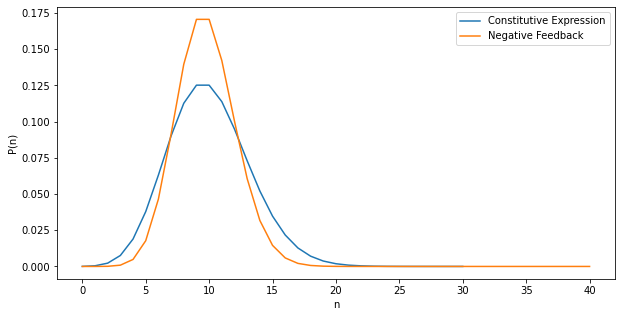

In [3]:
plt.figure(figsize = (10, 5))
plt.plot(n_vec, prob(n_vec), label = "Constitutive Expression")

n = 40
n_vec = np.arange(0, n+1)

def creation(n):
    alpha = 55
    k = 2
    C = alpha/(1 + n/k)
    return C

plt.plot(n_vec, prob(n_vec), label = "Negative Feedback")
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()
plt.show()

---

<span style="color:red">The negative feedback model has less variability compared to the constitutive expression model, but their mean stays the same. This must be due to the fact that the "speed" of the reaction around the steady state is much higher for negative feedback, so as soon as the systems diverges from the steady state, it will be drawn back to it in a "stronger" and "faster" way. </span>

---

Finally, calculate the stationary probability density $P(n)$ of a birth-death process with cooperative positive feedback with leakiness (defined by $C(n)=\alpha_0+\frac{\alpha_p n^p}{k^p+n^p}$), with $\alpha_0 = 10$, $\alpha_p=75$, $p=4$, and $k=40$.

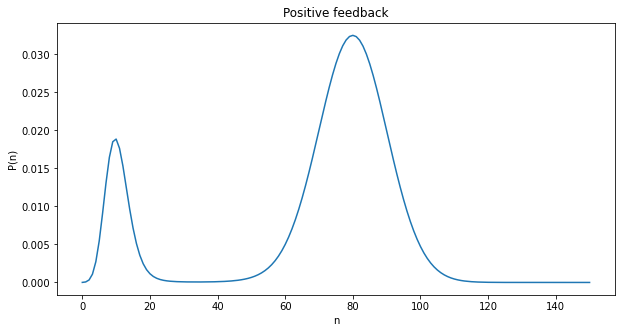

In [6]:
n = 150
n_vec = np.arange(0, n+1)

def creation(n):
    a0 = 10
    ap = 75
    p = 4
    k = 40
    C = a0 + (ap * n**p)/(k**p + n**p)
    return C

plt.figure(figsize = (10, 5))
plt.plot(n_vec, prob(n_vec))
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title("Positive feedback")
plt.show()

---

<span style="color:red">

In the positive feedback model we have two steady states. In our plot, they correspond to the two distinct peaks of the curve. The mean of the first peak corresponds to the continuous signal $\alpha_0 = 10$ and the second one corresponds to the signal plus our $\alpha$ ($\alpha_0 + \alpha_p = 10 + 75 = 80$).  
The second peak is significantly higher than the first one. This is because it has a much larger $(k = 40; +\infty)$ basin of attraction than the first one $(0; k = 40)$, so it is more likely that the malecules end up in the second steady state.</span>

---